In [34]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [35]:
# Read CSV file
df = pd.read_csv('Telco-Customer-Churn.csv')

In [36]:
# Preview DataFrame head
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [37]:
# Get the summary of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
# Check for null values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [39]:
# Drop the customerID column
df.drop('customerID', axis=1, inplace=True)

In [40]:
# Check for unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [41]:
# Change TotalCharges column to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Drop rows with NaN values
df = df.dropna()

In [42]:
# Map Churn column from Yes/No to 1/0
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [43]:
# Encode dummy variables for categorical columns
df = pd.get_dummies(df, drop_first=True)

In [44]:
# Recheck data types of columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   gender_Male                            7032 non-null   bool   
 6   Partner_Yes                            7032 non-null   bool   
 7   Dependents_Yes                         7032 non-null   bool   
 8   PhoneService_Yes                       7032 non-null   bool   
 9   MultipleLines_No phone service         7032 non-null   bool   
 10  MultipleLines_Yes                      7032 non-null   bool   
 11  InternetS

In [45]:
# Create feature and target arrays
X = df.drop('Churn', axis=1).values
y = df['Churn'].values

# Split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, stratify=y)

# Scale the train and test features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

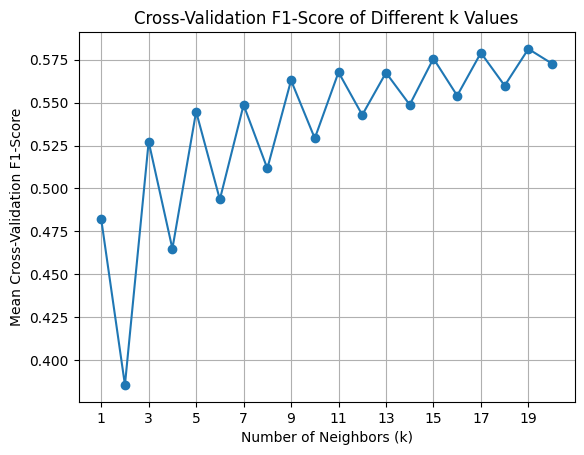

Best cross-validation f1-score: 0.5813080191763239
Best number of neighbors: 19


In [46]:
# Instantiate KNN Model
knn = KNeighborsClassifier()

# Define parameter grid
param_grid = {'n_neighbors': range(1,21)}

# Define KFold to split data into 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=17)

# Apply GridSearchCV to perform 5 folds cross-validation
grid = GridSearchCV(knn, param_grid, cv=kf, scoring='f1')
grid.fit(X_train_scaled, y_train)

# Extract mean test scores and k values from GridSearchCV
mean_scores = grid.cv_results_['mean_test_score']
k_values = grid.cv_results_['param_n_neighbors']

# Plot mean test scores and k values
plt.plot(k_values, mean_scores, marker='o')
plt.title('Cross-Validation F1-Score of Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation F1-Score')
plt.xticks(range(1, 21, 2))
plt.grid(True)
plt.show()

# Print the number of neighbors with best score
print(f"Best cross-validation f1-score: {grid.best_score_}")
print(f"Best number of neighbors: {grid.best_params_['n_neighbors']}")

In [47]:
# Instantiate new KNN model with the best number of neighbors and train the model
knn_best = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn_best.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = knn_best.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[896 137]
 [156 218]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1033
           1       0.61      0.58      0.60       374

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407

Accuracy Score: 0.7917555081734187
